In [2]:
import matplotlib.pyplot as plt
from kwconfig import gkey
import pandas as pd
import numpy as np
import os
import requests
import json
import gmaps
from pprint import pprint
gmaps.configure(api_key=gkey)

wine_data = "../Project1_group1/winemag-data_first150k.csv"
wine_df = pd.read_csv(wine_data)
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
#drop the columns with no values to create a shorter set of data
wine_df2=wine_df.drop(columns= ["Unnamed: 0","region_2"], axis=1)
dropped_wine= wine_df2.dropna()

frame_df=dropped_wine[["country","region_1","price"]]

frame_df


,country,region_1,price
0,US,Napa Valley,235.0
1,Spain,Toro,110.0
2,US,Knights Valley,90.0
3,US,Willamette Valley,65.0
4,France,Bandol,66.0
5,Spain,Toro,73.0
6,Spain,Toro,65.0
7,Spain,Toro,110.0
8,US,Chehalem Mountains,65.0
9,US,Sonoma Coast,60.0


In [4]:
frame_df.describe()

,price
count,77284.000000
mean,37.584817
std,36.403885
min,4.000000
25%,18.000000
50%,29.000000
75%,45.000000
max,2013.000000


In [5]:
bins=[0,15,30,50,100,500,2500]
group_names=["Max Price $15", "Max Price $30", "Max Price $50", "Max Price $100","Max Price $500","More than $500"]
frame_df["Price Range"]=pd.cut(frame_df["price"],bins,labels=group_names)

frame_df

C:\Users\karis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,region_1,price,Price Range
0,US,Napa Valley,235.0,Max Price $500
1,Spain,Toro,110.0,Max Price $500
2,US,Knights Valley,90.0,Max Price $100
3,US,Willamette Valley,65.0,Max Price $100
4,France,Bandol,66.0,Max Price $100
5,Spain,Toro,73.0,Max Price $100
6,Spain,Toro,65.0,Max Price $100
7,Spain,Toro,110.0,Max Price $500
8,US,Chehalem Mountains,65.0,Max Price $100
9,US,Sonoma Coast,60.0,Max Price $100


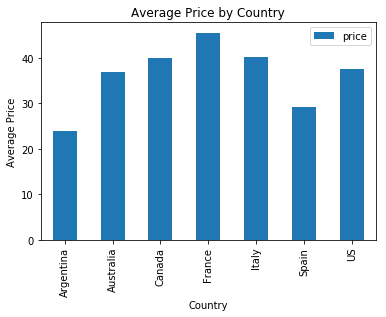

In [15]:
indexme=frame_df.set_index("country")
indexme
countryplot=indexme.groupby("country").mean().plot(kind="bar")
countryplot.set_xlabel("Country")
countryplot.set_ylabel("Average Price")
countryplot.plot
plt.title("Average Price by Country")
plt.savefig("countryprice.png",dpi=200)




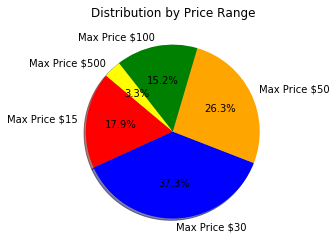

In [16]:
#us_data=indexme.loc["US","price"]

#length of wines that cost between
low=indexme["Price Range"]=="Max Price $15"
truelowprice=len(indexme.loc[low, :])

#length of wines that cost between $500 and $1,000
low2=indexme["Price Range"]=="Max Price $30"
truelow2=len(indexme.loc[low2, :])

#length of wines that cost between $1,000 and $1,500
mid1=indexme["Price Range"]=="Max Price $50"
truemid1=len(indexme.loc[mid1,:])

#length of wines that cost more than $1,500
mid2=indexme["Price Range"]=="Max Price $100"
truemid2=len(indexme.loc[mid2,:])

high1=indexme["Price Range"]=="Max Price $500"
truehigh1=len(indexme.loc[high1,:])

#start creating the pie chart
labels = ["Max Price $15", "Max Price $30", "Max Price $50", "Max Price $100","Max Price $500"]
sizes=[truelowprice,truelow2,truemid1,truemid2,truehigh1]
colors=["red","blue","orange","green","yellow"]
explode=(0,0,0,0,0)


#create the pie chart based upon the values above
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=140)
plt.title("Distribution by Price Range")
plt.savefig("pricepiechart.png",dpi=200)